**Jeffrey Elkner**

(1)	The Excel file, GGS560_HW3_Data.xlsx, contains data from the NOAA/AOML web site at http://www.aoml.noaa.gov/hrd/tcfaq/E11.html. The values include the numbers of named storms in the Atlantic basin from 1851 to 2008 (2009 version of the data file). For simplifying the problem, the values were cut to the number of named storms data from 1995 to 2008 only. Please calculate the mean, variance, standard deviation, coefficient of variation, skewness (2), and kurtosis (2). (8 points). 

In [1]:
# SOLUTION: Firstly, import the spreadsheet using the Pandas library.
# Display the sheet names to confirm it has been imported.

import pandas as pd

file = 'GGS560_HW3_Data.xlsx'
xl = pd.ExcelFile(file)

xl.sheet_names

['Hurricane_Data_Short', 'Chap3_Pb10', 'Household_Income', 'H11AR_2010']

In [2]:
# The sheet of interest is in the 'Hurricane_Data_Short' sheet, so read
# it into a data frame and display it. Since the heading 'Named Storms'
# is split between 2 rows, skip the first row and just use 'Storms'.

sheet = xl.parse('Hurricane_Data_Short', header=1)
sheet

,Year,Storms
0,1995,19
1,1996,13
2,1997,8
3,1998,14
4,1999,12
5,2000,15
6,2001,15
7,2002,12
8,2003,16
9,2004,15


The statistical functions needed in this assignment are built into the pandas Python library, but I am using my own implementations of these functions as required for this assignment. My source code is available at https://github.com/jelkner/ggs560.

> Note: I have also attached a copy of the ggs560_tools.py module with this assignment submission.

In [3]:
# Get the 'Storms' column and compute the mean, variance, standard deviation,
# coefficient of variation, skewness, and kurtosis on the sample data using
# functions from my ggs560_tools.py module. Note: the variance,
# standard_deviation, coefficient_of_variation, skewness, and kurtosis
# functions have an optional population parameter set to False by default
# which computes population rather than sample values when set to True.
from ggs560.ggs560_tools import mean
from ggs560.ggs560_tools import variance
from ggs560.ggs560_tools import standard_deviation as sd
from ggs560.ggs560_tools import coefficient_of_variation as cv
from ggs560.ggs560_tools import skewness
from ggs560.ggs560_tools import kurtosis

data = sheet['Storms']

print("mean = {:0.2f}".format(mean(data)))
print("variance = {:0.2f}".format(variance(data)))
print("standard deviation = {:0.2f}".format(sd(data)))
print("coefficient of variation = {:0.2f}".format(cv(data)))
print("skewness = {:0.2f}".format(skewness(data)))
print("kurtosis = {:0.2f}".format(kurtosis(data)))

mean = 14.86
variance = 21.82
standard deviation = 4.67
coefficient of variation = 0.31
skewness = 1.40
kurtosis = 5.34


(2)	(A modified version of Problem 10 of the textbook): Twelve coordinate pairs and weights are given
    in another data sheet in the same Excel file.



In [4]:
# The sheet of interest is in the 'Chap3_Pb10' sheet, so read it into a
# data frame.
sheet2 = xl.parse('Chap3_Pb10')
sheet2

,X,Y,Weight
0,60,80,4
1,45,45,5
2,70,60,6
3,55,60,7
4,65,75,4
5,70,45,3
6,80,60,2
7,45,75,2
8,30,70,2
9,55,50,1


         (a) Plot the data points (their relative locations on a sheet) (2 points)

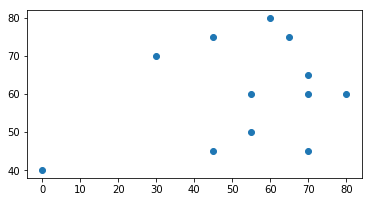

In [5]:
# SOLUTION: Use matplotlib to make a scatter plot of the 'X' and 'Y' columns
# from the dataframe.
import matplotlib.pyplot as plt

x = sheet2['X']
y = sheet2['Y']

plt.scatter(x, y)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

         (b) Calculate simple mean (no weight) center and weighted mean center (6 points)

In [6]:
# SOLUTION: Add mean_center and weighted_mean_center functions to
# ggs560_tools module and use them to compute after sheet2 data is converted
# into expected format.
from ggs560.ggs560_tools import mean_center
from ggs560.ggs560_tools import weighted_mean_center

points = [(sheet2['X'][i], sheet2['Y'][i]) for i in sheet2.index]
x, y = mean_center(points)
print("mean center = ({:0.2f}, {:0.2f})".format(x, y))

weights = [sheet2['Weight'][i] for i in sheet2.index]
weights
points_n_weights = [[points[i], weights[i]] for i in range(len(points))]
x, y = weighted_mean_center(points_n_weights)
print("weighted mean center = ({:0.2f}, {:0.2f})".format(x, y))

mean center = (53.75, 60.42)
weighted mean center = (57.24, 61.18)


         (c) Calculate the weighted standard distance (5 points)

weighted standard distance = 19.34


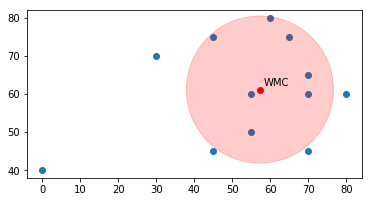

In [7]:
# SOLUTION: Add weighted_standard_distance functions to ggs560_tools module
# with data formatted as for weighted_mean_center.
from ggs560.ggs560_tools import weighted_standard_distance
from matplotlib.patches import Circle

sd = weighted_standard_distance(points_n_weights)
print("weighted standard distance = {:0.2f}".format(sd))

# Then use pyplot to draw the weighted standard distance as a shaded area
# around the weighted mean center.

x = sheet2['X']
y = sheet2['Y']

plt.scatter(x, y)
wmx, wmy = weighted_mean_center(points_n_weights)
plt.plot([wmx], [wmy], 'ro')
plt.gca().annotate('WMC', xy=(wmx, wmy), xytext=(wmx + 1, wmy + 1))
plt.gca().set_aspect('equal', adjustable='box')
circle = plt.Circle((wmx, wmy), sd, color='red', alpha=0.2)
plt.gca().add_artist(circle)
plt.show()

(3)	The US household income data can be found from the US Census bureau at
    https://www.census.gov/data/tables/2017/demo/income-poverty/p60-259.html (or more specificly
    at https://www2.census.gov/programs-surveys/demo/tables/p60/259/tableA1.xls). The 2016 household
    Median income is `$`59,039 and the Mean income is `$`83,143. Which of the following statements is the
    most suitable answer based on the income numbers above: (4 points)

        (a) More families have household income less than the national mean household
            income;
  
        (b) The household income distribution is positively skewed;

        (c) Relatively, a small number of families have extremely high incomes
            (a long tail in the positive side of the income distribution);

        (d) All of above.

*Solution*: All of the above, (d).  The median value of `$`59,039 means half of families earn household incomes of less than that amount, so clearly more families earn less than the `$`83,143 mean. When the mean is higher than the median, the distribution is positively skewed, which means the distribution has a long tail on the postitive side of the income distribution as a result of a relatively small number of families having extremely high incomes.